## Importing modules

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
import datasets
dataset = datasets.load_dataset('ucberkeley-dlab/measuring-hate-speech', 'default')
df = dataset['train'].to_pandas()
df.describe()

Generating train split:   0%|          | 0/135556 [00:00<?, ? examples/s]

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,hatespeech,hate_speech_score,infitms,outfitms,annotator_severity,std_err,annotator_infitms,annotator_outfitms,hypothesis,annotator_age
count,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.00000,135556.000000,135556.000000,135556.000000,135556.000000,...,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135451.000000
mean,23530.416138,5567.097812,1.281352,2.954307,2.828875,2.56331,2.278638,2.698575,1.846211,1.052045,...,0.744733,-0.567428,1.034322,1.001052,-0.018817,0.300588,1.007158,1.011841,0.014589,37.910772
std,12387.194125,3230.508937,1.023542,1.231552,1.309548,1.38983,1.370876,0.898500,1.402372,1.345706,...,0.932260,2.380003,0.496867,0.791943,0.487261,0.236380,0.269876,0.675863,0.613006,11.641276
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.340000,0.100000,0.070000,-1.820000,0.020000,0.390000,0.280000,-1.578693,18.000000
25%,18148.000000,2719.000000,0.000000,2.000000,2.000000,2.00000,1.000000,2.000000,1.000000,0.000000,...,0.000000,-2.330000,0.710000,0.560000,-0.380000,0.030000,0.810000,0.670000,-0.341008,29.000000
50%,20052.000000,5602.500000,1.000000,3.000000,3.000000,3.00000,3.000000,3.000000,2.000000,0.000000,...,0.000000,-0.340000,0.960000,0.830000,-0.020000,0.340000,0.970000,0.850000,0.110405,35.000000
75%,32038.250000,8363.000000,2.000000,4.000000,4.000000,4.00000,3.000000,3.000000,3.000000,2.000000,...,2.000000,1.410000,1.300000,1.220000,0.350000,0.420000,1.170000,1.130000,0.449555,45.000000
max,50070.000000,11142.000000,3.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,...,2.000000,6.300000,5.900000,9.000000,1.360000,1.900000,2.010000,9.000000,0.987511,81.000000


In [4]:
df.head()

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,47777,10873,3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,39773,2790,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,47101,3379,3,4.0,4.0,4.0,4.0,4.0,4.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,43625,7365,3,2.0,3.0,2.0,1.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,12538,488,0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,True,False


In [5]:
df.columns

Index(['comment_id', 'annotator_id', 'platform', 'sentiment', 'respect',
       'insult', 'humiliate', 'status', 'dehumanize', 'violence',
       ...
       'annotator_religion_hindu', 'annotator_religion_jewish',
       'annotator_religion_mormon', 'annotator_religion_muslim',
       'annotator_religion_nothing', 'annotator_religion_other',
       'annotator_sexuality_bisexual', 'annotator_sexuality_gay',
       'annotator_sexuality_straight', 'annotator_sexuality_other'],
      dtype='object', length=131)

In [6]:
req = ["hate_speech_score" , "text"]

df.drop(columns = [col for col in df.columns if col not in req] , inplace = True)


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135556 entries, 0 to 135555
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hate_speech_score  135556 non-null  float64
 1   text               135556 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.1+ MB


In [8]:
hate = (df['hate_speech_score'] > 0.5).sum()
not_hate = (df['hate_speech_score'] < -1).sum()
neutral = len(df) - hate - not_hate

print(hate , not_hate , neutral)


49048 53651 32857


In [9]:
df = df[~((df['hate_speech_score'] >= -1) & (df['hate_speech_score'] <= 0.5))]

In [10]:
hate = (df['hate_speech_score'] > 0.5).sum()
not_hate = (df['hate_speech_score'] < -1).sum()
neutral = len(df) - hate - not_hate

print(hate , not_hate , neutral)

49048 53651 0


In [11]:
df.head()

,hate_speech_score,text
0,-3.90,Yes indeed. She sort of reminds me of the elde...
1,-6.52,The trans women reading this tweet right now i...
4,1.54,For starters bend over the one in pink and kic...
5,-4.93,Sounds like the kinda wholsesome life I'd die ...
7,2.08,Fuck off you insufferable retarded faggot.


In [12]:
df['hate_speech_score'] = df['hate_speech_score'].apply(lambda x: 0.0 if x < -1.0 else 1.0)

In [13]:
df.head()

,hate_speech_score,text
0,0.0,Yes indeed. She sort of reminds me of the elde...
1,0.0,The trans women reading this tweet right now i...
4,1.0,For starters bend over the one in pink and kic...
5,0.0,Sounds like the kinda wholsesome life I'd die ...
7,1.0,Fuck off you insufferable retarded faggot.


## Text Preprocessing

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

vocab = set()

stop_words = set(stopwords.words('english'))

def preprocess_text(text):

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]

    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens]

    vocab.update(tokens)

    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


In [16]:
df['preprocessed_text'] = df['text'].apply(preprocess_text)

In [17]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n”“’')

tokenizer.fit_on_texts(df['preprocessed_text'])

X = tokenizer.texts_to_sequences(df['preprocessed_text'])

max_len = max(len(y) for y in X)

X = pad_sequences(X, maxlen=max_len)

In [18]:
max_len

73

In [19]:
max_words = len(tokenizer.word_index)
max_words

36504

In [20]:
from keras.utils import to_categorical
y = to_categorical(df['hate_speech_score'])

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

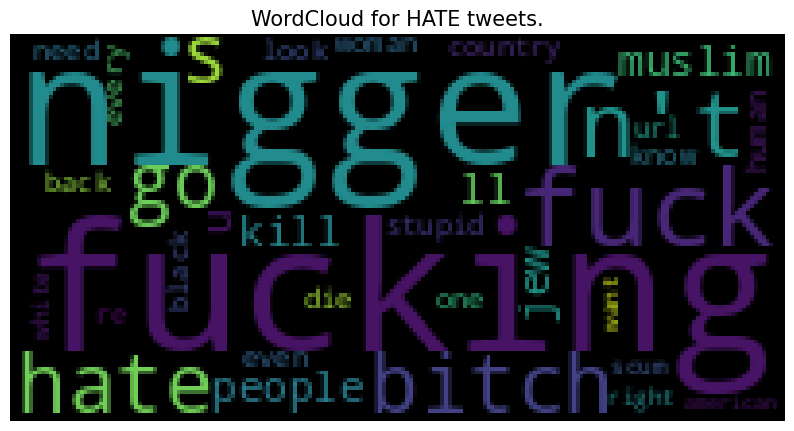

In [22]:
def plot_word_cloud(data, typ):
  tweet_corpus = " ".join(data['preprocessed_text'])

  plt.figure(figsize = (10,10))

  wc = WordCloud(max_words = 100,
                width = 200,
                height = 100,
                collocations = False).generate(tweet_corpus)

  plt.title(f'WordCloud for {typ} tweets.', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()

plot_word_cloud(df[df['hate_speech_score']>0.5], typ='HATE')

In [23]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((82159, 73), (20540, 73), (82159, 2), (20540, 2))

In [29]:
print(np.max(X_train))
print(np.max(X_val))

X_train = np.clip(X_train, 0, 36503)
X_val = np.clip(X_val, 0, 36503)

36484
36504


In [30]:
print(np.max(X_train))
print(np.max(X_val))

36484
36503


In [31]:
embedding_dim = 512

## Model Development

In [32]:
from keras.callbacks import EarlyStopping

model = keras.models.Sequential([
    layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length = max_len , trainable = True),
    layers.Bidirectional(layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(2, activation='softmax')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 73, 512)           18690048  
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               656384    
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 19479042 (74.31 MB)
Trainable params: 19479042 (74.31 MB)
Non-trainable params: 0 (0.00 Byte)
____________

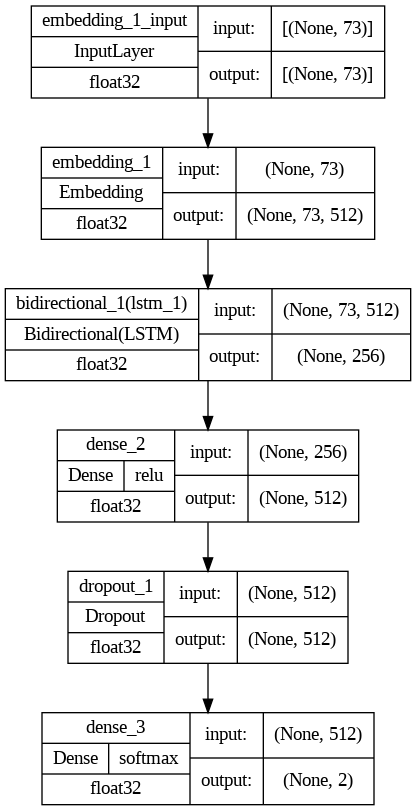

In [33]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [36]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=1,
                    verbose=1,
                    batch_size=32
                    )

2568/2568 [==============================] - 4602s 2s/step - loss: 0.1771 - accuracy: 0.9277 - val_loss: 0.1220 - val_accuracy: 0.9519


## Model Evaluation

In [37]:
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

642/642 [==============================] - 109s 170ms/step - loss: 0.1220 - accuracy: 0.9519
Validation Loss: 0.12204240262508392
Validation Accuracy: 0.9519473910331726


In [39]:
from sklearn.metrics import classification_report, confusion_matrix

y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true = np.argmax(y_val, axis=1)

642/642 [==============================] - 108s 168ms/step


In [40]:
print(classification_report(y_val_true, y_val_pred_classes, target_names=['Not Hate', 'Hate']))

              precision    recall  f1-score   support

    Not Hate       0.94      0.97      0.95     10761
        Hate       0.96      0.93      0.95      9779

    accuracy                           0.95     20540
   macro avg       0.95      0.95      0.95     20540
weighted avg       0.95      0.95      0.95     20540



In [41]:
conf_matrix = confusion_matrix(y_val_true, y_val_pred_classes)
print(conf_matrix)

[[10424   337]
 [  650  9129]]


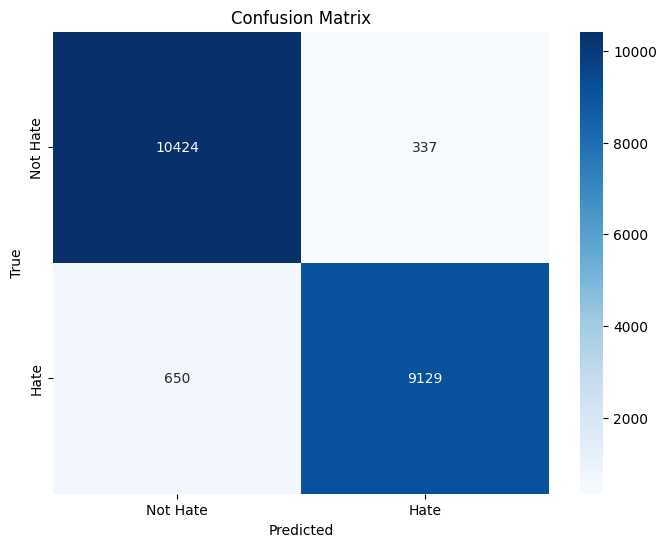

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Hate', 'Hate'], yticklabels=['Not Hate', 'Hate'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

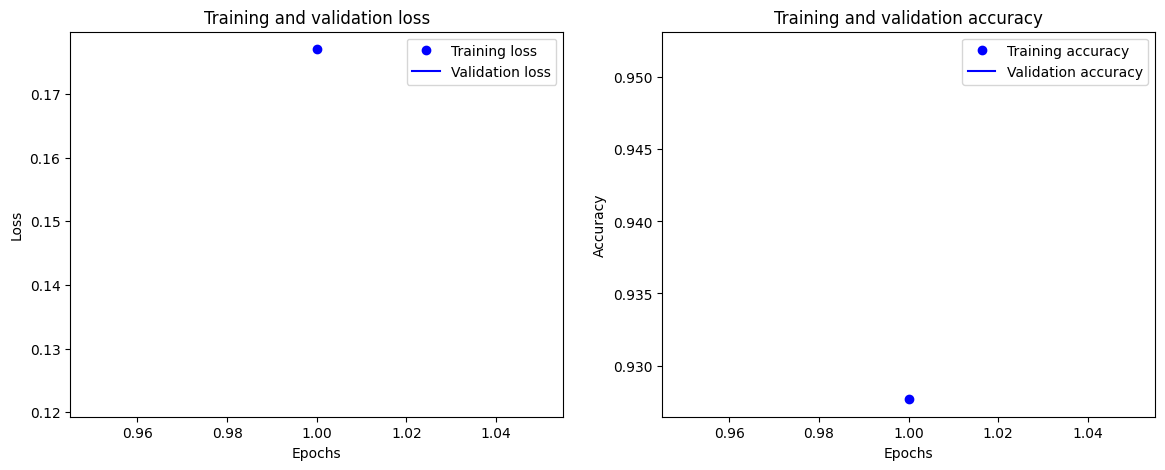

In [43]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()